In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-19-2021.csv')

In [5]:
# 1. Write a Python program to display the first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.
df.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-08-20 04:21:33,33.93911,67.709953,152411,7047,NaN,NaN,Afghanistan,391.516813,4.623682
1,NaN,NaN,NaN,Albania,2021-08-20 04:21:33,41.15330,20.168300,137597,2473,NaN,NaN,Albania,4781.326013,1.797278
2,NaN,NaN,NaN,Algeria,2021-08-20 04:21:33,28.03390,1.659600,190078,4929,NaN,NaN,Algeria,433.462894,2.593146
3,NaN,NaN,NaN,Andorra,2021-08-20 04:21:33,42.50630,1.521800,14981,129,NaN,NaN,Andorra,19389.115382,0.861091
4,NaN,NaN,NaN,Angola,2021-08-20 04:21:33,-11.20270,17.873900,45325,1133,NaN,NaN,Angola,137.907352,2.499724


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            28 non-null     float64
 10  Active               28 non-null     float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3972 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


In [7]:
df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3986
Active                 3986
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      42
dtype: int64

In [8]:
# 2. Write a python program to replace all the missing values with “Tobefound” for province column.
df['Province_State'].fillna(value='Tobefound', inplace=True)

In [9]:
df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State            0
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3986
Active                 3986
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      42
dtype: int64

In [14]:
# 3. Find the Z-Score for column “Recovered”
df['Recovered'].isnull().sum()

3986

In [16]:
df['Recovered'].fillna(value=0,inplace=True)
stats.zscore(df['Recovered'])

0      -0.038158
1      -0.038158
2      -0.038158
3      -0.038158
4      -0.038158
          ...   
4009   -0.038158
4010   -0.038158
4011   -0.038158
4012   -0.038158
4013   -0.038158
Name: Recovered, Length: 4014, dtype: float64

In [23]:
# 4. Create bin values for “Recovered” column in the data set.
bins = pd.cut(df['Recovered'],bins=5)
# df['Recovered'].value_counts()

In [29]:
# 5. Write a Python program to get the maximum number of confirmed, deaths, 
# recovered and active cases of Novel Coronavirus (COVID-19) Country wise.
df[df['Confirmed'] == df['Confirmed'].max()]['Country_Region']

216    France
Name: Country_Region, dtype: object

In [31]:
df[df['Deaths'] == df['Deaths'].max()]['Country_Region']

65    Brazil
Name: Country_Region, dtype: object

In [33]:
df[df['Recovered'] == df['Recovered'].max()]['Country_Region']

3997    Malaysia
Name: Country_Region, dtype: object

In [32]:
df[df['Active'] == df['Active'].max()]['Country_Region']

3997    Malaysia
Name: Country_Region, dtype: object

In [35]:
# 6. Write a Python program to get the total number of confirmed deaths and 
# recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise
df.groupby(by=['Country_Region', 'Province_State'])['Confirmed','Deaths','Recovered'].sum()

/var/folders/rz/6rwl1std7dz1npfq_pm66bfr0000gn/T/ipykernel_65148/1864770527.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Country_Region', 'Province_State'])['Confirmed','Deaths','Recovered'].sum()


,,Confirmed,Deaths,Recovered
Country_Region,Province_State,,,
Afghanistan,Tobefound,152411,7047,0.0
Albania,Tobefound,137597,2473,0.0
Algeria,Tobefound,190078,4929,0.0
Andorra,Tobefound,14981,129,0.0
Angola,Tobefound,45325,1133,0.0
...,...,...,...,...
West Bank and Gaza,Tobefound,323582,3628,0.0
Winter Olympics 2022,Tobefound,0,0,0.0
Yemen,Tobefound,7407,1414,0.0


In [1]:
# 7. Write a Python program to create a plot (lines) of total deaths, 
# confirmed, recovered and active cases Country wise where deaths greater than 150.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


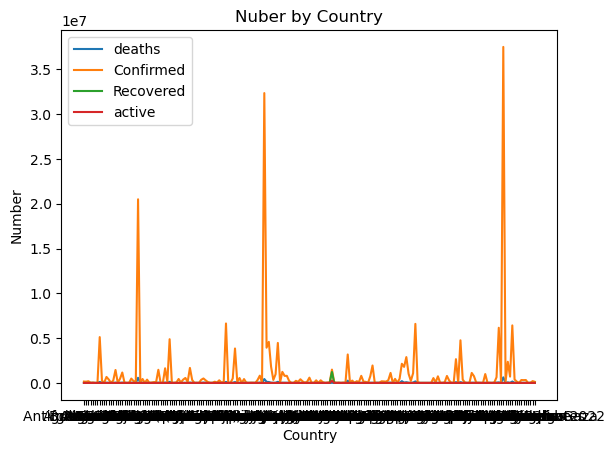

In [45]:
# total deaths

plt.plot(df.groupby(by='Country_Region')['Deaths'].sum(), label='deaths')
plt.plot(df.groupby(by='Country_Region')['Confirmed'].sum(), label='Confirmed')
plt.plot(df.groupby(by='Country_Region')['Recovered'].sum(), label='Recovered')
plt.plot(df.groupby(by='Country_Region')['Active'].sum(), label='active')
plt.xlabel("Country")
plt.ylabel('Number')
plt.title("Nuber by Country")
plt.legend()

In [37]:
df['Province_State'].value_counts()

Texas               255
Tobefound           179
Georgia             161
Virginia            134
Kentucky            121
                   ... 
Sikkim                1
Tamil Nadu            1
Telangana             1
Tripura               1
Pitcairn Islands      1
Name: Province_State, Length: 598, dtype: int64

In [40]:
df.groupby(by='Country_Region')['Deaths'].sum()

Country_Region
Afghanistan             7047
Albania                 2473
Algeria                 4929
Andorra                  129
Angola                  1133
                        ... 
West Bank and Gaza      3628
Winter Olympics 2022       0
Yemen                   1414
Zambia                  3564
Zimbabwe                4198
Name: Deaths, Length: 201, dtype: int64